<a href="https://colab.research.google.com/github/m-stoeckel/TrumpTweetGAN/blob/master/ManuelStoeckel/BertGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install torch===1.2.0 torchvision===0.4.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip3 install transformers tensorboardX
!pip3 install --upgrade tqdm
!pip3 install bert-score
!git clone https://github.com/NVIDIA/apex
%cd apex
!pip3 install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./
%cd ..

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Requirement already up-to-date: tqdm in /usr/local/lib/python3.6/dist-packages (4.36.1)
Cloning into 'apex'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 5433 (delta 1), reused 4 (delta 1), pack-reused 5422
Receiving objects: 100% (5433/5433), 13.33 MiB | 5.80 MiB/s, done.
Resolving deltas: 100% (3512/3512), done.
/content/apex
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:243: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-unot011v
Created temporary directory: /tmp/pip-req-tracker-oq36hitu
Created requirements tracker '/tmp/pip-req-tracker-oq36hitu'
Created temporary directory: /tmp/pip-install-kigciyif
Processing /co

### Aquire project & transformer repo from GitHub

In [0]:
!git clone https://github.com/m-stoeckel/TrumpTweetGAN.git
!git clone https://github.com/huggingface/transformers

Cloning into 'TrumpTweetGAN'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 1242 (delta 0), reused 23 (delta 0), pack-reused 1218
Receiving objects: 100% (1242/1242), 58.45 MiB | 11.90 MiB/s, done.
Resolving deltas: 100% (598/598), done.
Cloning into 'transformers'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 9301 (delta 4), reused 2 (delta 0), pack-reused 9284
Receiving objects: 100% (9301/9301), 4.90 MiB | 3.10 MiB/s, done.
Resolving deltas: 100% (6750/6750), done.


In [0]:
%cd TrumpTweetGAN/
!git checkout dev_manu
!git pull
%cd ..

/content/TrumpTweetGAN
Branch 'dev_manu' set up to track remote branch 'dev_manu' from 'origin'.
Switched to a new branch 'dev_manu'
Already up to date.
/content


### GPT-2 fine-tuning

In [0]:
!rm -rf /content/gpt2-trumped /content/output /content/runs 
!mkdir /content/gpt2-trumped

In [0]:
!python ./transformers/examples/run_lm_finetuning.py \
    --do_train --do_eval --eval_all_checkpoints \
    --num_train_epochs 5 --save_steps 476 \
    --model_type gpt2 --model_name_or_path gpt2 \
    --per_gpu_train_batch_size 2 --per_gpu_eval_batch_size 2 \
    --train_data_file /content/TrumpTweetGAN/dataset/trump_tweets_2009-2019.txt \
    --eval_data_file /content/TrumpTweetGAN/dataset/testdata/trump_tweets_2009-2019_test.txt \
    --output_dir /content/gpt2-trumped \
    --fp16

09/29/2019 12:35:01 - WARNING - __main__ -   Process rank: -1, device: cuda, n_gpu: 1, distributed training: False, 16-bits training: True
09/29/2019 12:35:01 - INFO - transformers.configuration_utils -   loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-config.json from cache at /root/.cache/torch/transformers/4be02c5697d91738003fb1685c9872f284166aa32e061576bbe6aaeb95649fcf.085d5f6a8e7812ea05ff0e6ed0645ab2e75d80387ad55c1ad9806ee70d272f80
09/29/2019 12:35:01 - INFO - transformers.configuration_utils -   Model config {
  "attn_pdrop": 0.1,
  "embd_pdrop": 0.1,
  "finetuning_task": null,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_layer": 12,
  "n_positions": 1024,
  "num_labels": 1,
  "output_attentions": false,
  "output_hidden_states": false,
  "pruned_heads": {},
  "resid_pdrop": 0.1,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
 

### Save model in Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')
# !cp -r gpt2-trumped/ '/content/drive/My Drive/'
# drive.flush_and_unmount()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cp -r '/content/drive/My Drive/gpt2-trumped/' /content/

In [0]:
!rm -rf gpt2-trumped-temp/
!mkdir gpt2-trumped-temp/
!ln -f /content/gpt2-trumped/*.* gpt2-trumped-temp/
# !ln -f gpt2-trumped/checkpoint-476/*.* gpt2-trumped-temp/
!python ./TrumpTweetGAN/run_generation.py \
    --model_type gpt2 --model_name_or_path gpt2-trumped-temp/ \
    --prompt '/content/TrumpTweetGAN/dataset/testdata/trump_tweets_2016-2019_test.txt' \
    --length 40

09/30/2019 21:57:07 - INFO - transformers.tokenization_utils -   Model name 'gpt2-trumped-temp/' not found in model shortcut name list (gpt2, gpt2-medium, gpt2-large). Assuming 'gpt2-trumped-temp/' is a path or url to a directory containing tokenizer files.
09/30/2019 21:57:07 - INFO - transformers.tokenization_utils -   loading file gpt2-trumped-temp/vocab.json
09/30/2019 21:57:07 - INFO - transformers.tokenization_utils -   loading file gpt2-trumped-temp/merges.txt
09/30/2019 21:57:07 - INFO - transformers.tokenization_utils -   loading file gpt2-trumped-temp/added_tokens.json
09/30/2019 21:57:07 - INFO - transformers.tokenization_utils -   loading file gpt2-trumped-temp/special_tokens_map.json
09/30/2019 21:57:07 - INFO - transformers.tokenization_utils -   loading file gpt2-trumped-temp/tokenizer_config.json
09/30/2019 21:57:07 - INFO - transformers.configuration_utils -   loading configuration file gpt2-trumped-temp/config.json
09/30/2019 21:57:07 - INFO - transformers.configurati

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import argparse
import logging

import numpy as np
import torch
import torch.nn.functional as F
from tqdm.notebook import trange
from transformers import GPT2Config, OpenAIGPTConfig, XLNetConfig, TransfoXLConfig
from transformers import GPT2LMHeadModel, GPT2Tokenizer

device = torch.device('cuda')

tokenizer = GPT2Tokenizer.from_pretrained('/content/gpt2-trumped')
model = GPT2LMHeadModel.from_pretrained('/content/gpt2-trumped')
model.to(device)
model.eval()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): Laye

In [0]:
def embed(model: GPT2LMHeadModel, txt):
  txt = tokenizer.encode(src)
  txt = torch.tensor(txt, dtype=torch.long, device=device).unsqueeze(0)
  ret = model(txt)
  return ret[0].mean(dim=1)

def compare(model: GPT2LMHeadModel, src, gen):
  return F.cosine_similarity(embed(model, src), embed(model, gen)).item()

In [0]:
import torch
from tqdm.notebook import tqdm
from bert_score import score
with open('/content/TrumpTweetGAN/dataset/testdata/trump_tweets_2009-2019_test.txt', 'r', encoding='utf-8') as sourceS,\
  open('/content/TrumpTweetGAN/save/20190929/trump_tweets_2009-2019/seqgan_vanilla_lt-JS_sl75_temp1_T0929_2257_57/samples/samples_ADV_00020.txt', 'r', encoding='utf-8') as seqganS:
  cands = [line.strip() for line in seqganS]
  refs = [line.strip() for line in sourceS]

  max_F1 = torch.Tensor(len(cands))
  for i, cand in tqdm(enumerate(cands)):
    _, _, F1 = score([cand for _ in range(len(refs))], refs, bert="bert-base-uncased", verbose=True)
    max_F1[i] = F1.max()

In [0]:
with open('/content/gpt-2_samples-per_tweet.txt', 'r', encoding='utf-8') as generatedF,\
  open('/content/TrumpTweetGAN/dataset/testdata/trump_tweets_2009-2019_test.txt', 'r', encoding='utf-8') as sourceF,\
  open('/content/cosine_sim.tsv', 'w', encoding='utf8') as tsv:
  source = [line.strip() for line in sourceF]
  generated = [line.strip().split('\t\t',maxsplit=1)[0] for line in generatedF]
  _, _, F1 = score(generated, source, bert="bert-base-uncased", verbose=True)

FileNotFoundError: ignored

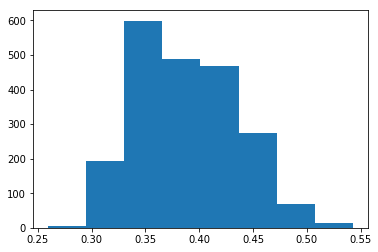

In [0]:
import matplotlib.pyplot as plt
plt.hist(F1, bins=len(cands))
plt.show()